## 데이터셋 요약
- 총 데이터 수 : 200개
- 컬럼 : 5개
    - Customer: 고객 ID
    - Age: 고객 나이
    - Annual Income (k$): 고객 연간 소득
    - Spending Score (1-100): 고객의 소비 점수

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

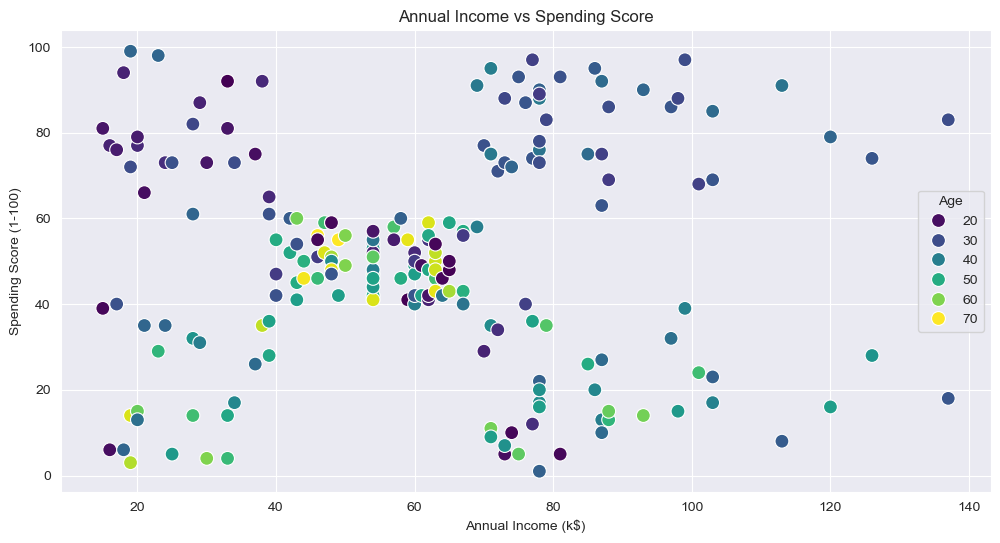

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 데이터 불러오기
file_path = 'data/mall_customers.csv'
data = pd.read_csv(file_path)

# 데이터 확인
print(data.head())
print(data.info())
print(data.describe())

# 데이터 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Age', palette='viridis', s=100)
plt.title('Annual Income vs Spending Score')
plt.show()

## KMeans 모델링
K-means는 비지도 학습(unsupervised learning) 알고리즘 중 하나로, 데이터를 k 개의 클러스터로 나누는 방법입니다.

### WSS
WCSS (Within-Cluster Sum of Squares)는 K-means 클러스터링에서 클러스터 내 데이터들이 클러스터 중심(centroid)으로부터 얼마나 가까운지를 측정하는 지표입니다.

###

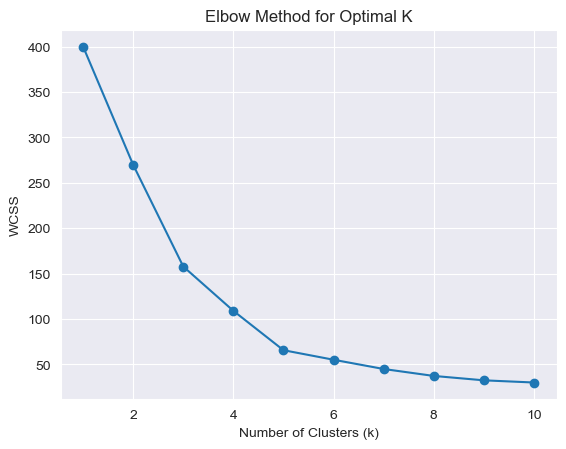

In [4]:
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv('data/Mall_Customers.csv')

# 필요한 컬럼만 선택
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans 모델링
wcss = []  # Within-Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# 엘보우 그래프 시각화
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- 밀도 기반 클러스터링 알고리즘
- 특정 거리 내에 일정 개수 이상의 데이터가 존재하면 클러스터를 형성
- 노이즈와 이상치를 구분할 수 있어 복잡한 형태의 클러스터도 잘 구분 가능

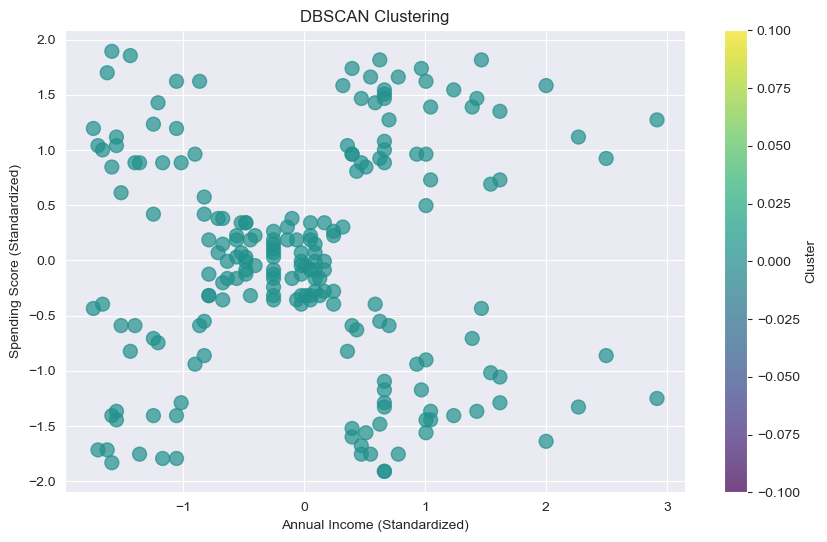

Cluster
0    200
Name: count, dtype: int64


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('data/Mall_Customers.csv')

# 필요한 컬럼 선택 (Annual Income, Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 모델링
dbscan = DBSCAN(eps=0.9, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# 클러스터 결과 데이터프레임에 추가
df['Cluster'] = clusters

# 클러스터링 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.colorbar(label='Cluster')
plt.show()

# 클러스터 결과 확인
print(df['Cluster'].value_counts())


## 계층적 군집화
### 데이터 불러오기 및 전처리
- Mall Customers 데이터에서 Annual Income과 Spending Score만 사용해 클러스터링을 수행합니다.
- 데이터를 표준화(StandardScaler)하여 클러스터링 결과에 영향을 미치지 않도록 합니다.

### 덴드로그램(Dendrogram)
- 덴드로그램은 클러스터링 계층 구조를 시각적으로 보여줍니다.
- ward 방법은 클러스터 간의 분산을 최소화하는 방식입니다.
- 덴드로그램에서 수직선이 길게 꺾이는 지점이 클러스터를 나누기에 적합한 위치입니다.

### AgglomerativeClustering(병합 군집화)
- AgglomerativeClustering을 사용해 5개의 클러스터로 데이터를 나눕니다.
- ward 방법을 사용하여 클러스터를 병합해 나갑니다.
- fit_predict로 클러스터링을 수행하고, 각 데이터 포인트에 클러스터를 할당합니다.

### 시각화
- 클러스터별로 데이터를 색상으로 구분해 시각화합니다.
- 클러스터 중심은 따로 표시되지 않지만, 클러스터의 밀도와 분포를 확인할 수 있습니다.

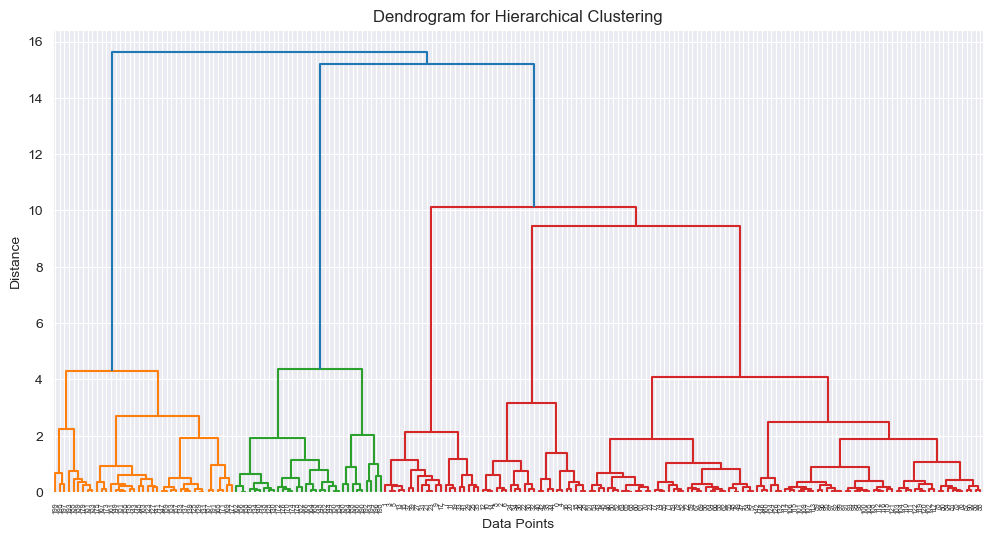

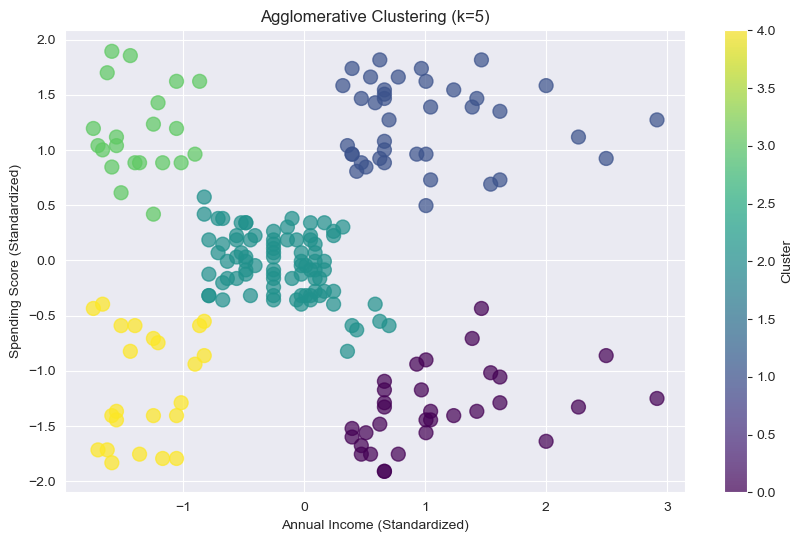

Cluster
2    85
1    39
0    32
4    23
3    21
Name: count, dtype: int64


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('data/Mall_Customers.csv')

# 필요한 컬럼 선택 (Annual Income, Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 덴드로그램(Dendrogram) 그리기
plt.figure(figsize=(12, 6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Agglomerative Clustering (병합 군집화)
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = agg_clustering.fit_predict(X_scaled)

# 클러스터 결과 데이터프레임에 추가
df['Cluster'] = clusters

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=100, alpha=0.7)
plt.title('Agglomerative Clustering (k=5)')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.colorbar(label='Cluster')
plt.show()

# 클러스터 결과 확인
print(df['Cluster'].value_counts())